# Introduction to Natural Language Processing with Python - Part 1 

### Exploring and vectorizing textual data 

In this study we will analyse the translation from English into Brazilian Portuguese of IMDB movie reviews. 

In [7]:
#Importing the data
import pandas as pd

review = pd.read_csv("imdb-reviews-pt-br.csv")

In [8]:
review

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [9]:
print("Negative\n")
print(review["text_pt"][200])

Negative

Este é o terceiro filme em um mês que eu assisti que não saiu do jeito que eu esperava. Os dois primeiros são A Dália Negra e Hollywoodland, nenhum dos quais deu novas idéias de quem cometeu os crimes. Eu sempre tive um fascínio com OVNIs e estava tão empolgado para ver um novo filme sobre o tema da investigação sobre OVNIs que não era um comédia. Mas depois de 30 minutos, tudo deu muito errado. Eu poderia ter defendido a atuação, os ângulos de câmera, os estereótipos se houvesse uma boa história sobre perseguir OVNIs, mas nenhum aqui. Eu não estou dizendo que havia algo de errado com o assunto, mas Netflix empurrou este filme como um cético OVNI e um crente de OVNI investigando vários sitations.I parou de assistir a meio caminho. Não posso acreditar que perdi tanto tempo com este. Por favor, não cometa o mesmo erro que eu fiz.


In [10]:
print("Positive\n")
print(review["text_pt"][49002])

Positive

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior

In [11]:
#Replating labels 
classification= review["sentiment"].replace(["neg", "pos"],[0, 1])

In [12]:
review["classification"] = classification
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classification  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg               0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg               0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg               0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg               0  
4  Filmes de fotos de latão não é uma palavra apr...       neg               0

In [13]:
review.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classification  
49454               1  
49455               1  
49456               1  
49457               1  
49458               1

In [14]:
print(review["classification"].value_counts())

0    24765
1    24694
Name: classification, dtype: int64


In [15]:
#Vectorizing the data:

from sklearn.feature_extraction.text import CountVectorizer

#In english: ['I watched a great movie', 'I watched a terrible movie']
texts = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

vectorizing = CountVectorizer(lowercase = False)
bag_of_words = vectorizing.fit_transform(texts)


In [16]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [17]:
vectorizing.get_feature_names()

['Assisti', 'filme', 'péssimo', 'um', 'ótimo']

In [19]:
vec_df = pd.SparseDataFrame()
vec_df

###  Classifying sentiment : step by step 

In [20]:
vectorizing = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizing.fit_transform(review["text_pt"])

In [21]:
print(bag_of_words.shape)

(49459, 50)


In [22]:
from sklearn.model_selection import train_test_split


train, test, class_train, class_test = train_test_split(bag_of_words,
                                                              review["classification"],
                                                              random_state = 42)


In [23]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [24]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(solver = "lbfgs")
logistic_reg.fit(train, class_train)
predict_test = logistic_reg.predict_proba(test)
print(predict_test)

[[0.25696739 0.74303261]
 [0.72224991 0.27775009]
 [0.70076066 0.29923934]
 ...
 [0.46019618 0.53980382]
 [0.46166722 0.53833278]
 [0.61777927 0.38222073]]


In [25]:
predict_test_bol = predict_test[:,1] >= 0.5
print(predict_test_bol)

[ True False False ...  True  True False]


In [26]:
import numpy as np

predict_test_int = predict_test_bol.astype(np.int)
print(predict_test_int)

[1 0 0 ... 1 1 0]


In [27]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(class_test, predict_test_int)
print(acc_test)

0.6583097452486858


### Visualizing the data with WordCloud 

In [28]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review["text_pt"]])

In [29]:
wcloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(all_words)

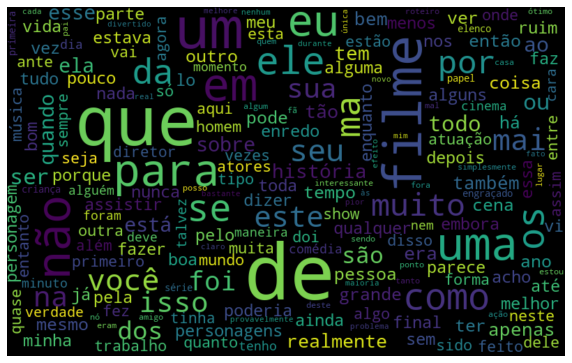

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

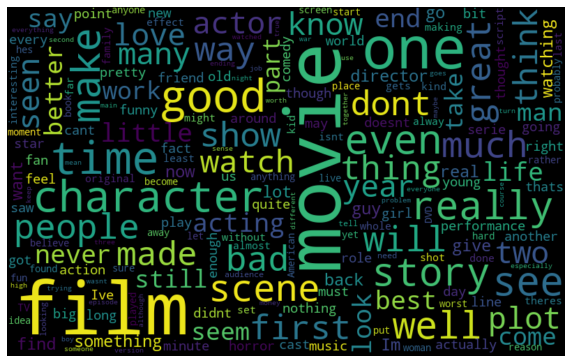

In [31]:
#For comparison, the word cloud in English:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review["text_en"]])

wcloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(all_words)
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [32]:
#The wordcloud in Portuguese showed a great prevalence of unimportant words for sentiment analisys: 
# de = from 
# que = that
# para = to
#We need to fix that. 

In [33]:
positive_review = review.query("sentiment == 'pos'")

In [34]:
positive_review.head()

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   

       classification  
12389               1  
12390               1  
12391               1  
12392               1  
12393               1

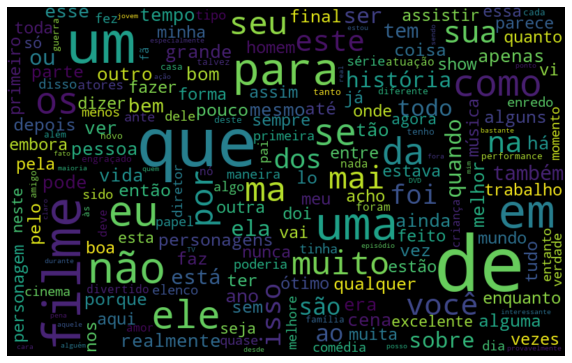

In [36]:
positive_words = ' '.join([text for text in positive_review["text_pt"]])
wcloud = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
negative_review = review.query("sentiment == 'neg'")

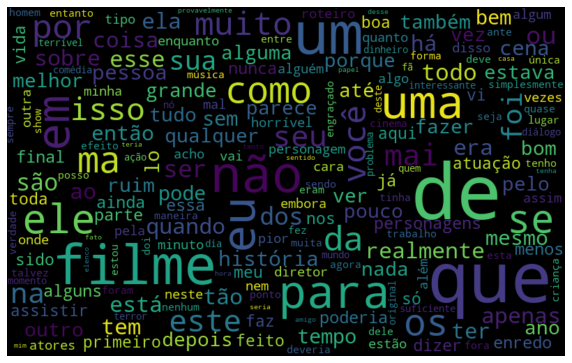

In [39]:
negative_words = ' '.join([text for text in negative_review["text_pt"]])
wcloud = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tokenizing with NLTK to create a new visualization 

In [41]:
from nltk import tokenize

phrase = "Bem vindo ao mundo do PLN" # "Welcome to the world of NLP"
token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(phrase)
print(token_phrase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [43]:
import nltk

all_words = ' '.join([text for text in review["text_pt"]])
freq = nltk.FreqDist(token_space.tokenize(all_words))
df_freq= pd.DataFrame({"Word": list(freq.keys()),
                             "Frequency": list(freq.values())})



In [44]:
df_freq.head()

Word  Frequency
0  Mais       1538
1   uma     130888
2  vez,       1927
3     o     244881
4   Sr.       1741

In [45]:
df_freq = df_freq.nlargest(columns = "Frequency", n = 10)

In [47]:
df_freq

Word  Frequency
20    de     417651
14   que     325070
42     e     299743
3      o     244881
7     um     216410
102    a     210179
45     é     192381
200   em     132778
1    uma     130888
29   não     127915

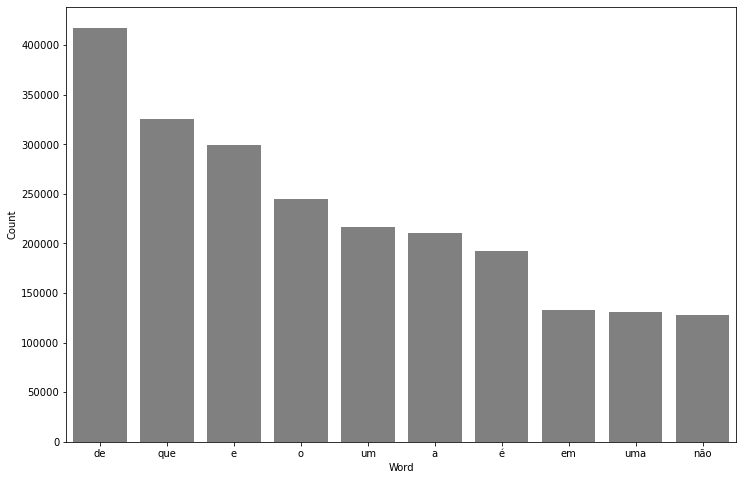

In [50]:
#Distribution of frequency of stop words
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_freq, x= "Word", y = "Frequency", color = 'gray')
ax.set(ylabel = "Count")
plt.show()

### Creating functions for an optimization pipeline 

In [54]:
irrelevant_words = nltk.corpus.stopwords.words("portuguese")
processed_phrase = list()

for opinion in review["text_pt"]:
    new_phrase = list()
    text_words = token_space.tokenize(opinion)
    for word in text_words:
        if word not in irrelevant_words:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))
    
review["treatment_1"] = processed_phrase



    
    

In [55]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classification                                        treatment_1  
0               0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1               0  Este exemplo motivo maioria filmes ação mesmos...  
2               0  Primeiro tudo odeio raps imbecis, poderiam agi...  
3               0  Nem Beatles puderam escrever músicas todos gos...  
4               0  Filmes fotos latão palavra apropriada eles, ve...

In [58]:
print("Phrase text_pt\n")
print(review["text_pt"][0])
print("\n Phrase treatment_1\n")
print(review["treatment_1"][0])















Phrase text_pt

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.

 Phr

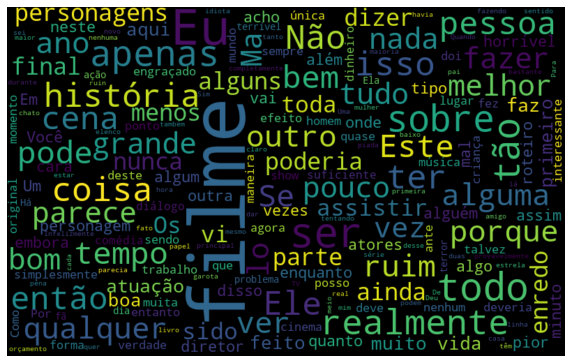

In [61]:
def negative_wcloud(text, column_text):
    negative_text = text.query("sentiment == 'neg'")
    all_words= ' '.join([text for text in negative_text[column_text]])
    wcloud = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
negative_wcloud(review, "treatment_1")


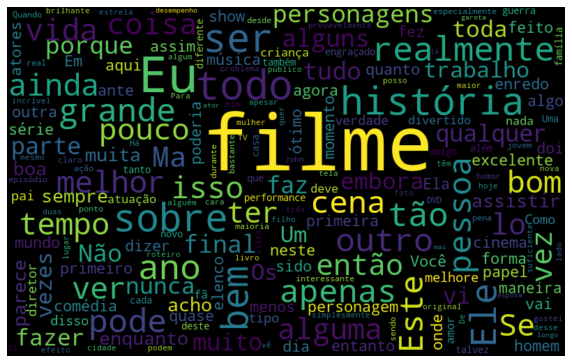

In [63]:
def positive_wcloud(text, column_text):
    positive_text = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in positive_text[column_text]])
    wcloud = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
positive_wcloud(review, "treatment_1")    


In [64]:
#Now we have less connection words appearing on the cloud

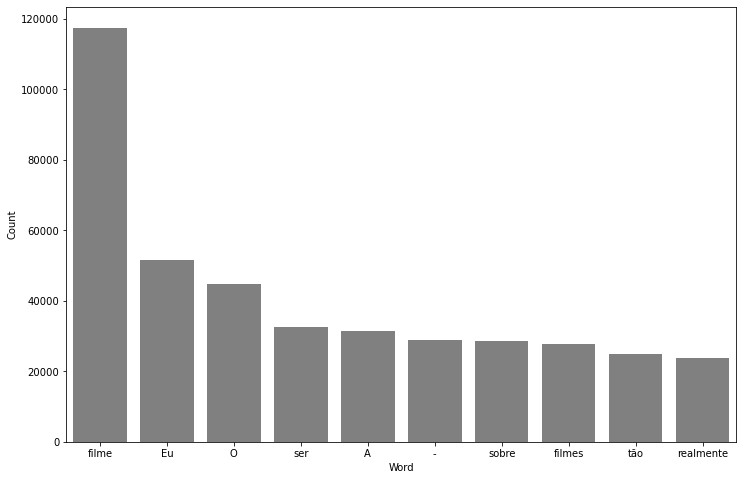

In [70]:
#Pareto diagram to visualize the distribution of words after the first treatment
def pareto(text, column_text, amount):
    all_words = ' '.join([text for text in text[column_text]])
    freq = nltk.FreqDist(token_space.tokenize(all_words))
    df_freq = pd.DataFrame({"Word": list(freq.keys()),
                                 "Frequency": list(freq.values())})
    df_freq = df_freq.nlargest(columns = "Frequency", n = amount)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_freq, x= "Word", y = "Frequency", color = 'gray')
    ax.set(ylabel = "Count")
    plt.show()   

pareto(review, "treatment_1", 10)

In [72]:
def classify_text(text, column_text, column_classification):
    vectorizing = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizing.fit_transform(text[column_text])
    train, test, class_train, class_test = train_test_split(bag_of_words,
                                                                 text[column_classification],
                                                                 random_state = 42)
    
    logistic_reg = LogisticRegression(solver="lbfgs")
    logistic_reg.fit(train, class_train)
    
    return logistic_reg.score(test, class_test)

acc_test = classify_text(review, "treatment_1", "classification")
print(acc_test)

0.6607359482410028


# Introduction to NLP with Python - Part 2 

### Optimizing the Analysis 

In [76]:
from nltk import tokenize

phrase = "Olá mundo!"  #"Hello world!"
token_punctuation = tokenize.WordPunctTokenizer()
token_phrase = token_punctuation.tokenize(phrase)

print(token_phrase)

['Olá', 'mundo', '!']


### Improving Pareto Chart 

In [77]:
#Removing punctuation from the text
from string import punctuation

#Creating a punctuation list using punctuation library
punct = list()
for point in punctuation:
    punct.append(point)

#Adding irrelevant words to the punctuation list
punct_stopwords = punct + irrelevant_words

processed_phrase= list()
#Iterating over the treated list 
for opinion in review["treatment_1"]:
    new_phrase = list()
    text_words = token_punctuation.tokenize(opinion)
    for word in text_words:
        if word not in punct_stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))
    
review["treatment_2"] = processed_phrase

In [78]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classification                                        treatment_1  \
0               0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1               0  Este exemplo motivo maioria filmes ação mesmos...   
2               0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3               0  Nem Beatles puderam escrever músicas todos gos...   
4               0  Filmes fotos latão palavra apropriada eles, ve...   

                                         treatment_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [0]:
review["treatment_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers é realizado logo início, esquecido tarde, importava. O personagem deveríamos importar é arrogante superconfiante, Ashton Kutcher. O problema é sai garoto pensa é melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher é levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [80]:
review["treatment_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

In [81]:
#We can notice that the text is much smaller now, after second treatment

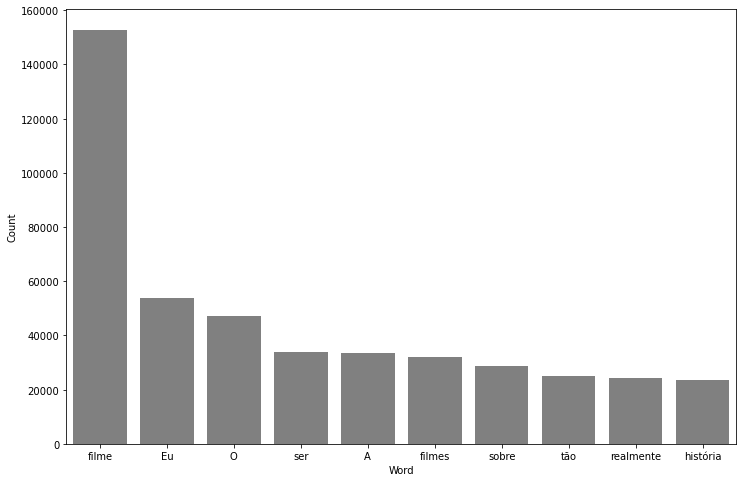

In [82]:
pareto(review, "treatment_2", 10)

### Normalizing the texts

In [89]:
#In portuguese, we have letters with accents , which characterise a different pronunciation for the word. The accents are applied to vowels: ^, ´ and ~
#We need to remove them. 

import unidecode

accents = "ótimo péssimo não é tão" #" great terrile no is so"

test = unidecode.unidecode(accents)
print(test)




otimo pessimo nao e tao


In [94]:
#Iterating over the text with unidecode
wth_no_accents = [unidecode.unidecode(text) for text in review["treatment_2"]]

In [95]:
wth_no_accents[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [98]:
stopwords_no_accents = [unidecode.unidecode(text) for text in punct_stopwords]

In [97]:
#stopwords_no_accents

In [100]:
review["treatment_3"] = wth_no_accents

processed_phrase = list()
for opinion in review["treatment_3"]:
    new_phrase = list()
    text_words = token_punctuation.tokenize(opinion)
    for word in text_words:
        if word not in stopwords_no_accents:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))
    
review["treatment_3"] = processed_phrase

In [0]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este é exemplo motivo maioria filmes ação mesm...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão é palavra apropriada eles, ...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este é exemplo motivo maioria filmes ação mesm...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão é palavra apropriada verdad...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [101]:
acc_treatment3 = classify_text(review, "treatment_3", "classification")
print(acc_treatment3)


0.6810351799433886


In [102]:
#The last result had less accuracy
acc_test

0.6607359482410028

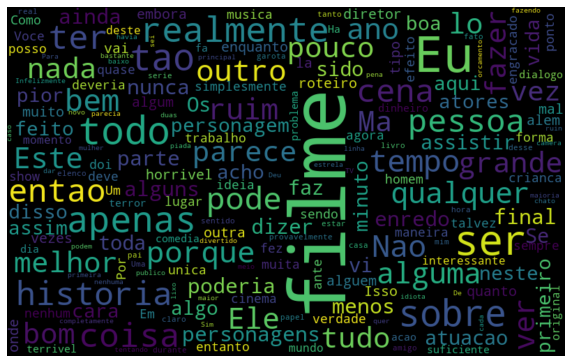

In [103]:
#Visualizing negative words word cloud again after third treatment
negative_wcloud(review, "treatment_3")

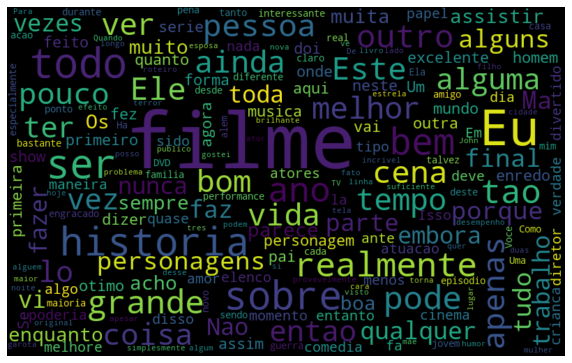

In [104]:
#Doing the same for the positive word cloud
positive_wcloud(review, "treatment_3")

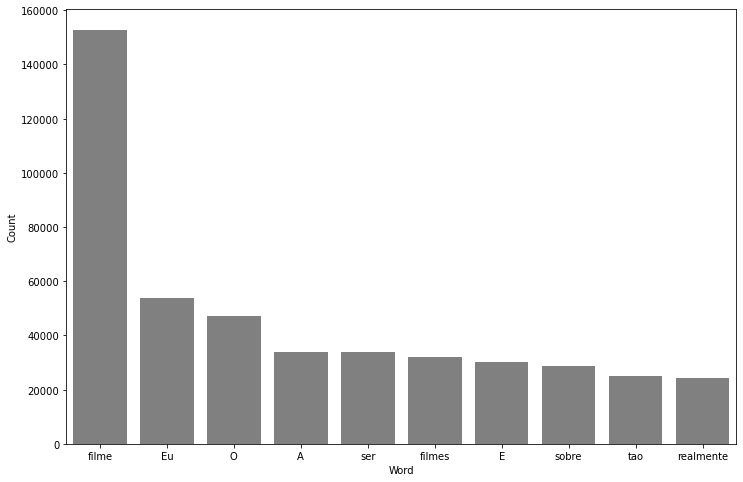

In [105]:
#Checking pareto chart after third treatment
pareto(review, "treatment_3", 10)

In [109]:
#Converting to Lowercase letters. Some stopwords (O , A) are still appearing in the pareto chart becuase they are in uppercase
phrase = "O Thiago é o novo instrutor da Alura"
print(phrase.lower())

o thiago é o novo instrutor da alura


In [110]:
processed_phrase = list()
for opinion in review["treatment_3"]:
    new_phrase = list()
    opinion = opinion.lower()
    text_words = token_punctuation.tokenize(opinion)
    for word in text_words:
        if word not in stopwords_no_accents:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))
    
review["treatment_4"] = processed_phrase

In [111]:
review["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [112]:
review["treatment_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [113]:
#Measuring the results of treatment 4
acc_treatment4 = classify_text(review, "treatment_4", "classification")
print(acc_treatment4)
print(acc_treatment3)


0.6879094217549535
0.6810351799433886


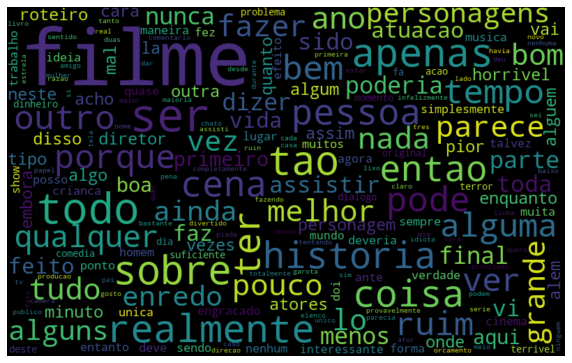

In [114]:
negative_wcloud(review, "treatment_4")

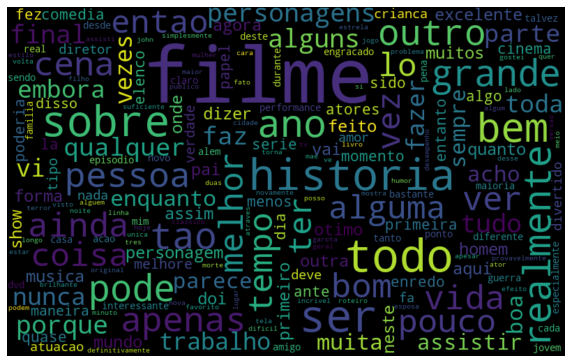

In [115]:
positive_wcloud(review, "treatment_4")

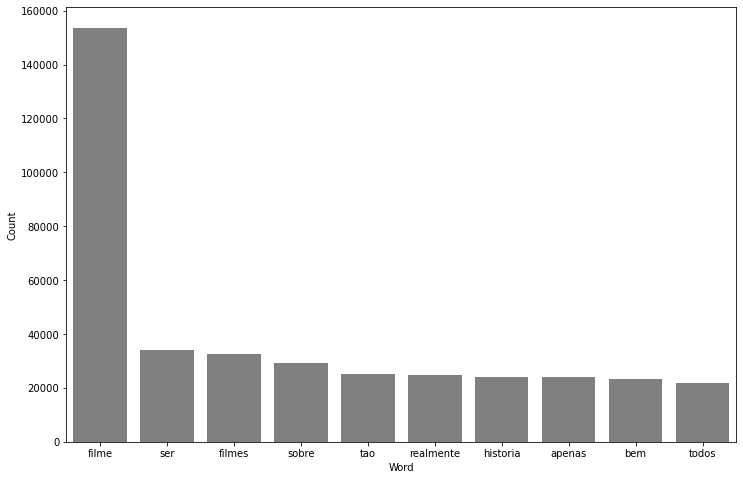

In [116]:
pareto(review, "treatment_4", 10)

### Avoiding derivations in words 

In [130]:
#Getting the radical of a word to avoid derivations from the same radical in the word filter
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")


'corr'

In [131]:
processed_phrase = list()
for opinion in review["treatment_4"]:
    new_phrase = list()
    text_words = token_punctuation.tokenize(opinion)
    for word in text_words:
        if word not in stopwords_no_accents:
            new_phrase.append(stemmer.stem(word))
    processed_phrase.append(' '.join(new_phrase))
    
review["treatment_5"] = processed_phrase




In [132]:
acc_treatment5 = classify_text(review, "treatment_5", "classification")
print(acc_treatment5)
print(acc_treatment4)

0.6943792964011323
0.6879094217549535


In [133]:
#More accuracy now with treatment 5

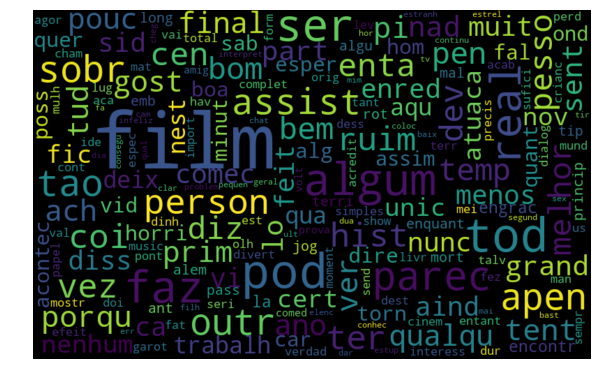

In [0]:
negative_wcloud(review, "treatment_5")

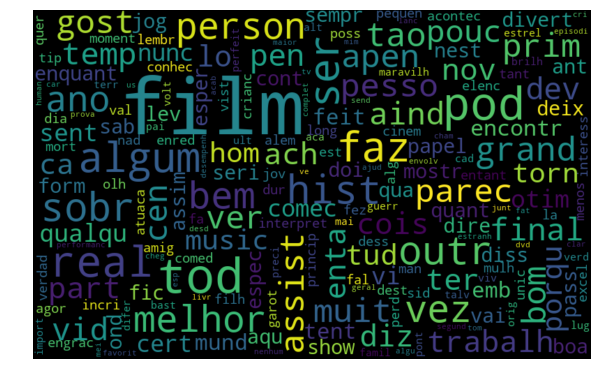

In [0]:
positive_wcloud(review,"treatment_5")


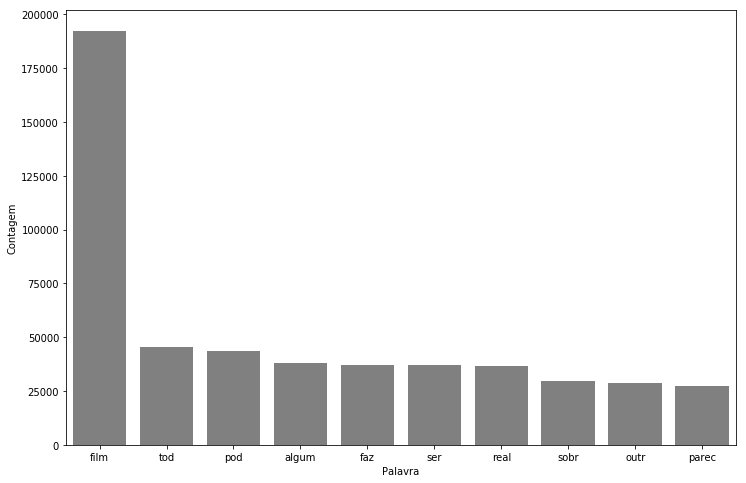

In [0]:
pareto(review, "treatment_5", 10)

### TF-IDF e Ngrams: advanced techniques

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

phrases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]
#"I watched a great film", "I watched a terrible film"

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

characteristics = tfidf.fit_transform(phrases)
pd.DataFrame(
    characteristics.todense(),
    columns=tfidf.get_feature_names()
)



Assiti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [135]:
tfidf_raw = tfidf.fit_transform(review["text_pt"])
train, test, class_train, class_test = train_test_split(tfidf_raw,
                                                              review["classification"],
                                                              random_state = 42)
logistic_reg.fit(train, class_train)
acc_tfidf_raw = logistic_reg.score(test, class_test)
print(acc_tfidf_raw)


0.6600889607763849


In [136]:
tfidf_treated = tfidf.fit_transform(review["treatment_5"])
train, test, class_train, class_test = train_test_split(tfidf_treated,
                                                              review["classification"],
                                                              random_state = 42)
logistic_reg.fit(train, class_train)
acc_tfidf_treated = logistic_reg.score(test, class_test)
print(acc_tfidf_treated)

0.6988273352203801


In [137]:
print(acc_treatment5)

0.6943792964011323


In [138]:
#Using ngrams

from nltk import ngrams

phrase = "Assisti um ótimo filme." # "I watched a great film."
separated_phrase = token_space.tokenize(phrase)
pairs = ngrams(separated_phrase, 2)
list(pairs)



[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [139]:
#ngram range (1,2) = isolated words and words in bigrams

tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(review["treatment_5"])
train, test, class_train, class_test = train_test_split(vetor_tfidf,
                                                              review["classification"],
                                                              random_state = 42)
logistic_reg.fit(train, class_train)
acc_tfidf_ngrams = logistic_reg.score(test, class_test)
print(acc_tfidf_ngrams)



0.8858875859280226


In [140]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(review["treatment_5"])
train, test, class_train, class_test = train_test_split(vetor_tfidf,
                                                              review["classification"],
                                                              random_state = 42)
logistic_reg.fit(train, class_train)
acc_tfidf = logistic_reg.score(test, class_test)
print(acc_tfidf)




0.8841892438334007


In [143]:
#Checking the weights of the words

weights = pd.DataFrame(
    logistic_reg.coef_[0].T,
    index = tfidf.get_feature_names()
)

weights.nlargest(50,0)

0
otim        8.290476
excel       7.978023
perfeit     6.578863
favorit     5.778018
maravilh    5.286500
incri       5.049495
hilari      4.653807
divert      4.579573
ador        4.422221
brilh       4.268573
hoj         4.204201
recom       4.186974
definitiv   4.160375
agrada      4.156803
soberb      3.582116
surpreend   3.579495
bom         3.503766
maravilhos  3.494372
ame         3.490777
class       3.469895
aind        3.457013
impression  3.394128
comov       3.375469
lind        3.185259
dvd         3.143878
mant        3.086201
fort        3.078827
joi         3.066973
fascin      3.050996
apreci      3.002310
subestim    2.976768
sutil       2.970026
melhor      2.927507
gost        2.913326
difer       2.860317
espec       2.856664
refresc     2.837496
sempr       2.803808
human       2.750003
am          2.718609
fantas      2.673733
obr         2.617332
emocion     2.616675
inesper     2.614235
intens      2.596168
pequen      2.587300
vai         2.586322
poder       2.585043
surpres     2.580789
performanc  2.573334

In [142]:
weights.nsmallest(10,0)

0
pi      -9.175702
ruim    -9.169724
horri   -8.751673
terri   -7.186909
chat    -6.919292
nad     -6.029855
infeliz -5.310520
decepca -4.995830
ridicul -4.950824
nenhum  -4.918832